In [1]:
import pandas as pd
import os
os.chdir("/home/robbe/ionbot")
import OxiAnalysis as OA
import seaborn as sns
import matplotlib.pyplot as plt
import importlib
importlib.reload(OA)

<module 'OxiAnalysis' from '/home/robbe/ionbot/OxiAnalysis.py'>

In [2]:
quant = pd.read_csv("/home/robbe/ionbot/ionbot_0.9.5/Synapse_Aging/quant/QuantifiedPeptides.tsv", sep="\t")
quant.drop(list(quant.filter(regex = 'Detection Type|Unnamed|gis')), axis = 1, inplace = True)

In [3]:
cols = [col for col in quant.columns if "Intensity" in col]

In [4]:
quantnorm = OA.quantile_transform(quant, cols)

# Biased

In [5]:
SI = OA.summedintensities(quantnorm)

/home/robbe/ionbot/OxiAnalysis.py:444: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quantexox.drop(list(quantexox.filter(regex = 'Detection Type')), axis = 1, inplace = True)


In [6]:
TSI = SI.set_index("Modifications").T

In [7]:
TSI.drop(["Gene Names","Organism","Oxmod?"], inplace=True)

In [8]:
traits = pd.read_csv("/home/robbe/ionbot/Ageing_study/0.Traits.csv")

In [9]:
traits

,SampleID,Sex,Age,PMI,Batch,RunOrder
0,ag_02_gis,0.7,46.7,23.6,1,1
1,ag_03_0247,1.0,55.0,16.0,1,2
2,ag_04_0210,0.0,44.0,27.0,1,3
3,ag_05_0306,0.0,52.0,36.0,1,4
4,ag_06_0120,0.0,42.0,42.0,1,5
...,...,...,...,...,...,...
88,ag_99_0193,1.0,50.0,11.0,3,89
89,ag_100_0081,1.0,62.0,14.0,3,90
90,ag_101_0479,1.0,44.0,13.0,3,91
91,ag_102_0463,1.0,49.0,16.0,3,92


In [10]:
TSI.reset_index(inplace=True)

In [11]:
TSI["index"] = TSI["index"].apply(lambda x : "_".join(x.split("_")[1:]))

In [12]:
data = pd.merge(TSI, traits, left_on="index", right_on="SampleID").drop('index', axis=1).set_index("SampleID")

In [13]:
data2 = data.filter(["[1917]Formylasparagine[H]", "[1918]Carbonyl[A]", "[1925]Delta:O(4)[W]", "[345]Trioxidation[C]", "[345]Trioxidation[F]", "[354]Nitro[Y]", "[35]Oxidation[C]", "[35]Oxidation[I]", "[35]Oxidation[P]", "[35]Oxidation[Q]", "[35]oxidation[M]", "[368]Cys->Dha[C]", "Age", "Sex", "Batch"], axis=1).reset_index()

In [14]:
data2

,SampleID,[1917]Formylasparagine[H],[1918]Carbonyl[A],[1925]Delta:O(4)[W],[345]Trioxidation[C],[345]Trioxidation[F],[354]Nitro[Y],[35]Oxidation[C],[35]Oxidation[I],[35]Oxidation[P],[35]Oxidation[Q],[35]oxidation[M],[368]Cys->Dha[C],Age,Sex,Batch
0,ag_102_0463,20.338579,5.733533,0.0,4.725288,0.000000,37.685099,0.0,67.460357,66.393122,15.550528,12369.485418,5.040774,49.0,1.0,3
1,ag_81_0459,21.998870,11.115801,0.0,10.569533,0.000000,35.122144,0.0,66.255343,99.655937,13.762414,13614.419439,4.834118,55.0,1.0,3
2,ag_05_0306,20.023773,0.000000,0.0,15.538794,9.695076,34.696787,0.0,61.458810,60.176313,9.357397,13444.094689,11.749683,52.0,0.0,1
3,ag_62_0494,9.154084,10.199348,0.0,14.817971,4.984327,39.263947,0.0,54.468715,55.359978,21.291477,14037.327670,14.752558,51.0,1.0,2
4,ag_51_0141,28.306899,10.008311,0.0,10.091317,5.153460,21.206121,0.0,85.528835,52.608626,4.289051,13820.343333,11.017577,65.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,ag_68_0274,10.888351,0.000000,0.0,10.401146,0.000000,34.778245,0.0,57.371675,76.912276,14.286688,14006.847865,10.293365,48.0,1.0,2
80,ag_67_0255,15.111177,5.571980,0.0,5.826315,11.079610,29.370148,0.0,59.766430,59.950322,20.418663,12164.849658,4.793014,45.0,0.0,2
81,ag_30_0231,20.369044,21.494994,0.0,15.253168,9.275022,44.076688,0.0,62.546718,49.031683,9.846107,13903.429882,6.704070,40.0,1.0,1
82,ag_44_0439,13.664772,9.669785,0.0,15.153955,4.689960,34.570209,0.0,71.350162,48.889659,15.009676,14199.014750,14.367151,41.0,0.0,2


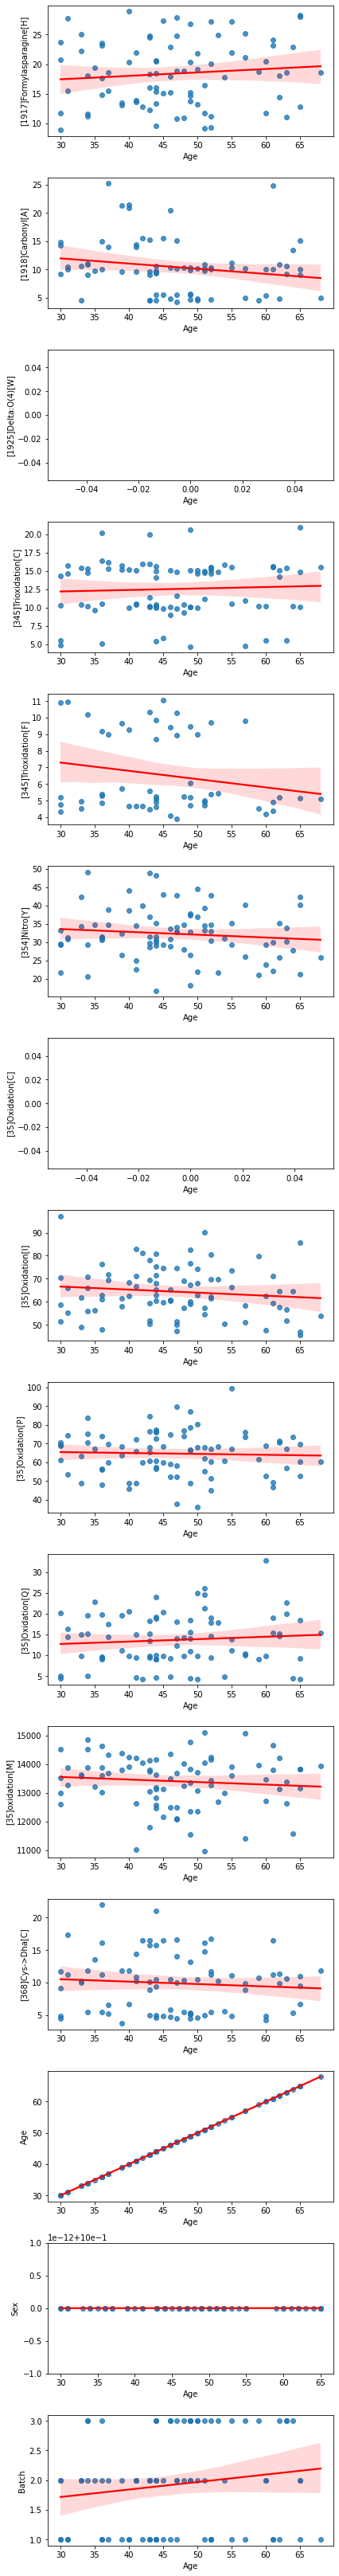

In [15]:
import numpy as np
from scipy import stats
# Define the columns to plot
data2 = data2.replace(0, np.nan)
columns_to_plot = data2.columns[1:16]

# Create the plot
fig, axes = plt.subplots(nrows=len(columns_to_plot), ncols=1, figsize=(6,3*len(columns_to_plot)))

# Plot each line
for i, col in enumerate(columns_to_plot):
    slope, intercept, r_value, p_value, std_err = stats.linregress(data2['Age'],data2[col])
    sns.regplot(x='Age', y=col, data=data2, ax=axes[i], line_kws={'label':'R^2: {}'.format(r_value**2), 'color':'r'})
    axes[i].set_xlabel('Age')
    axes[i].set_ylabel(col)
    
    handles, labels = axes[i].get_legend_handles_labels()
    if len(handles) > 1:
        axes[i].legend(handles=handles[1:], labels=labels[1:], loc='lower right')


# Add a legend and axis labels
fig.tight_layout(pad=1.0)
# fig.legend(loc="lower center", bbox_to_anchor=(0.5, -0.01), ncol=2)
# Show the plot
plt.show()

In [16]:
forPCA = data.reset_index()

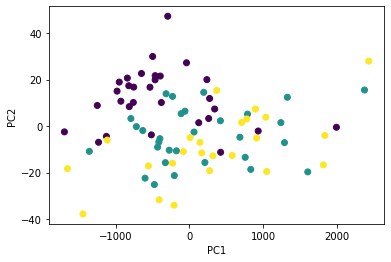

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

X = forPCA.drop(["SampleID", "Sex", "Age", "PMI", "Batch", "RunOrder"], axis=1)
y = forPCA["Batch"]

pca = PCA(n_components=2)

X_pca = pca.fit_transform(X)

plt.scatter(X_pca[:,0], X_pca[:, 1], c=y)
plt.xlabel('PC1')
plt.ylabel("PC2")
plt.show()

# Unbiased

In [18]:
quantnorm.head()

,Sequence,Base Sequence,Protein Groups,Gene Names,Organism,Intensity_ag_102_0463,Intensity_ag_81_0459,Intensity_ag_05_0306,Intensity_ag_62_0494,Intensity_ag_51_0141,...,Intensity_ag_92_0297,Intensity_ag_40_0262,Intensity_ag_100_0081,Intensity_ag_21_0436,Intensity_ag_68_0274,Intensity_ag_67_0255,Intensity_ag_30_0231,Intensity_ag_44_0439,Intensity_ag_15_0285,Modifications
0,AAAAAAAAAAAAAAAAGATCLER20|[402]Cys->Oxoalanine[C],AAAAAAAAAAAAAAAAGATCLER,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[402]Cys->Oxoalanine[C]
1,AAAAAAAAAAAAAAAGAGAGAKnan,AAAAAAAAAAAAAAAGAGAGAK,S12A2_HUMAN,NaN,NaN,5.497368,5.084458,5.123492,4.912040,4.885156,...,5.171082,5.286510,4.766519,5.315438,5.193560,4.608430,4.888027,5.330952,5.042246,None
2,AAAAAAAAAAAPPAPPEGASPGDSARnan,AAAAAAAAAAAPPAPPEGASPGDSAR,CSKI1_HUMAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,4.850360,NaN,NaN,4.451104,NaN,NaN,None
3,AAAAAAALQAKnan,AAAAAAALQAK,RL4_HUMAN,NaN,NaN,5.861488,5.823966,6.313443,6.361497,6.181862,...,6.205487,6.023863,6.221810,6.003831,6.218579,6.162341,6.092944,6.077183,6.023070,None
4,AAAAAAARGSNSDSPPGRPAPAASPEHRnan,AAAAAAARGSNSDSPPGRPAPAASPEHR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None


In [19]:
quantnormex = quantnorm.explode("Modifications")

In [20]:
g = quantnormex.groupby("Modifications").sum().drop(["Gene Names", "Organism"], axis=1)

In [21]:
g.replace(0, np.nan, inplace=True)

In [22]:
g.dropna(thresh=g.shape[1]*0.75, axis=0, inplace=True)

In [23]:
unbiased = g.T

In [24]:
unbiased = unbiased.reset_index()

In [25]:
unbiased["index"] = unbiased["index"].apply(lambda x : "_".join(x.split("_")[1:]))

In [26]:
unbiased

Modifications,index,Ala->Gly[A],Gly->Ala[G],Gly->Arg[G],Gly->Asn[G],Gly->Asp[G],Gly->Cys[G],Gly->Gln[G],Gly->Glu[G],Gly->His[G],...,[999976]Dimethyl_2H(6)[N-TERM],[999978]Dimethyl_2H(6)[R],[99997]ICPL_13C(6)2H(4)[N-TERM],[999981]Dimethyl_2H(6)13C(2)[R],[99998]ICPL_2H(4)[K],[999990]GIST-Quat[N-TERM],[999992]GIST-Quat_2H(3)[N-TERM],[999993]GIST-Quat_2H(3)[K],[999998]Galactosyl[N-TERM],semi_tryptic
0,ag_102_0463,74.372363,21.082159,8.545432,41.904155,40.987815,18.005909,19.607955,34.576683,17.400452,...,5.814742,7.720493,14.819413,NaN,3.624148,8.784026,5.395055,4.640966,4.101677,220.657318
1,ag_81_0459,79.345319,10.643838,13.195249,33.889256,43.363084,12.550317,25.591067,40.375739,17.835877,...,5.493589,8.804012,4.321743,4.078636,7.898332,14.237405,4.723977,5.035188,3.890595,290.102210
2,ag_05_0306,62.952935,14.770871,9.542847,26.626790,48.169607,13.603849,20.124326,61.709371,23.312229,...,4.961001,4.422277,13.128535,3.761952,12.292371,NaN,NaN,4.553284,4.493268,239.014281
3,ag_62_0494,78.706245,25.607648,4.194124,41.503916,49.352826,14.376932,24.303741,44.685208,21.389343,...,7.748268,9.577706,20.460789,4.037802,13.637470,8.103002,5.052088,8.308481,3.853562,226.466511
4,ag_51_0141,84.088802,20.450027,4.435975,32.647918,64.252832,14.252162,19.355486,60.843556,16.971040,...,5.310931,3.843099,14.308465,4.067726,12.994095,13.544912,9.966175,5.556706,4.485351,244.260528
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,ag_68_0274,86.529268,21.284333,8.479100,34.713213,50.698567,14.166159,25.706968,43.374228,22.305168,...,5.887510,4.207311,4.326308,NaN,3.716395,16.515990,4.887459,NaN,4.202379,223.615424
80,ag_67_0255,81.147086,20.917559,3.654620,32.534391,45.280841,8.907687,25.246533,46.209023,21.933304,...,5.568750,4.314737,8.688046,3.612458,20.085843,30.742282,11.393603,9.400413,3.869866,214.818484
81,ag_30_0231,98.540465,14.996766,8.211407,19.444664,62.382247,22.941289,25.280033,52.387167,22.032764,...,4.419438,4.511970,13.506618,4.172685,14.935724,5.433043,NaN,13.124722,4.443636,271.684712
82,ag_44_0439,80.668610,25.707107,9.235527,38.359982,67.817026,19.892383,20.108525,42.691089,23.422610,...,4.965086,4.066350,20.593422,3.663957,19.546136,3.792265,4.297663,10.286970,4.161473,272.676757


In [27]:
unbiased = pd.merge(unbiased, traits, left_on="index", right_on="SampleID")

In [28]:
unbiased

,index,Ala->Gly[A],Gly->Ala[G],Gly->Arg[G],Gly->Asn[G],Gly->Asp[G],Gly->Cys[G],Gly->Gln[G],Gly->Glu[G],Gly->His[G],...,[999992]GIST-Quat_2H(3)[N-TERM],[999993]GIST-Quat_2H(3)[K],[999998]Galactosyl[N-TERM],semi_tryptic,SampleID,Sex,Age,PMI,Batch,RunOrder
0,ag_102_0463,74.372363,21.082159,8.545432,41.904155,40.987815,18.005909,19.607955,34.576683,17.400452,...,5.395055,4.640966,4.101677,220.657318,ag_102_0463,1.0,49.0,16.0,3,92
1,ag_81_0459,79.345319,10.643838,13.195249,33.889256,43.363084,12.550317,25.591067,40.375739,17.835877,...,4.723977,5.035188,3.890595,290.102210,ag_81_0459,1.0,55.0,33.0,3,72
2,ag_05_0306,62.952935,14.770871,9.542847,26.626790,48.169607,13.603849,20.124326,61.709371,23.312229,...,NaN,4.553284,4.493268,239.014281,ag_05_0306,0.0,52.0,36.0,1,4
3,ag_62_0494,78.706245,25.607648,4.194124,41.503916,49.352826,14.376932,24.303741,44.685208,21.389343,...,5.052088,8.308481,3.853562,226.466511,ag_62_0494,1.0,51.0,41.0,2,57
4,ag_51_0141,84.088802,20.450027,4.435975,32.647918,64.252832,14.252162,19.355486,60.843556,16.971040,...,9.966175,5.556706,4.485351,244.260528,ag_51_0141,1.0,65.0,17.0,2,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,ag_68_0274,86.529268,21.284333,8.479100,34.713213,50.698567,14.166159,25.706968,43.374228,22.305168,...,4.887459,NaN,4.202379,223.615424,ag_68_0274,1.0,48.0,24.0,2,63
80,ag_67_0255,81.147086,20.917559,3.654620,32.534391,45.280841,8.907687,25.246533,46.209023,21.933304,...,11.393603,9.400413,3.869866,214.818484,ag_67_0255,0.0,45.0,29.0,2,62
81,ag_30_0231,98.540465,14.996766,8.211407,19.444664,62.382247,22.941289,25.280033,52.387167,22.032764,...,NaN,13.124722,4.443636,271.684712,ag_30_0231,1.0,40.0,16.0,1,28
82,ag_44_0439,80.668610,25.707107,9.235527,38.359982,67.817026,19.892383,20.108525,42.691089,23.422610,...,4.297663,10.286970,4.161473,272.676757,ag_44_0439,0.0,41.0,23.6,2,40


In [29]:
import numpy as np
from scipy import stats
# Define the columns to plot
columns_to_plot = unbiased.columns[1:-7]

# Create the plot
# fig, axes = plt.subplots(nrows=len(columns_to_plot), ncols=1, figsize=(6,3*len(columns_to_plot)))

# Plot each line
diction = {"Mod": [], "R2": [], "p": []}
for i, col in enumerate(columns_to_plot):
    slope, intercept, r_value, p_value, std_err = stats.linregress(unbiased['Age'],unbiased[col])
    # print("{}: R^2 = {}, p = {}".format(col, r_value**2, p_value))
    diction["Mod"].append(col)
    diction["R2"].append(r_value**2)
    diction["p"].append(p_value)

data = pd.DataFrame.from_dict(diction)

    # sns.regplot(x='Age', y=col, data=data2, ax=axes[i], line_kws={'label':'R^2: {}'.format(r_value**2), 'color':'r'})
    # axes[i].set_xlabel('Age')
    # axes[i].set_ylabel(col)
    
    # handles, labels = axes[i].get_legend_handles_labels()
    # if len(handles) > 1:
    #     axes[i].legend(handles=handles[1:], labels=labels[1:], loc='lower right')


# Add a legend and axis labels
# fig.tight_layout(pad=1.0)
# # fig.legend(loc="lower center", bbox_to_anchor=(0.5, -0.01), ncol=2)
# # Show the plot
# plt.show()

In [30]:
data.sort_values("R2", ascending=False)

,Mod,R2,p
34,[115]OxProBiotin[P],0.094366,0.004478
397,[901]4AcAllylGal[C],0.067051,0.017388
26,[1017]DMPO[Y],0.064707,0.019543
384,[7]Deamidated[Q],0.058133,0.027148
389,[822]Gly-loss+Amide[G],0.056021,0.030183
...,...,...,...
485,[99998]ICPL_2H(4)[K],NaN,NaN
486,[999990]GIST-Quat[N-TERM],NaN,NaN
487,[999992]GIST-Quat_2H(3)[N-TERM],NaN,NaN
488,[999993]GIST-Quat_2H(3)[K],NaN,NaN


# With further normalization

In [31]:
quant = pd.read_csv("/home/robbe/ionbot/ionbot_0.9.5/Synapse_Aging/quant/QuantifiedPeptides.tsv", sep="\t")
quant.drop(list(quant.filter(regex = 'Detection Type|Unnamed|gis')), axis = 1, inplace = True)

In [32]:
cols = [col for col in quant.columns if "Intensity" in col]

In [33]:
quantnorm = OA.quantile_transform(quant, cols)
quantnorm[cols] = quantnorm[cols].transform(lambda x: x/x.sum())

In [34]:
NSI = OA.summedintensities(quantnorm)

/home/robbe/ionbot/OxiAnalysis.py:444: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quantexox.drop(list(quantexox.filter(regex = 'Detection Type')), axis = 1, inplace = True)


In [35]:
NTSI = NSI.set_index("Modifications").T

In [36]:
NTSI.drop(["Gene Names","Organism","Oxmod?"], inplace=True)

In [37]:
traits = pd.read_csv("/home/robbe/ionbot/Ageing_study/0.Traits.csv")

In [38]:
NTSI.reset_index(inplace=True)

In [39]:
NTSI["index"] = NTSI["index"].apply(lambda x : "_".join(x.split("_")[1:]))

In [40]:
ndata = pd.merge(NTSI, traits, left_on="index", right_on="SampleID").drop('index', axis=1).set_index("SampleID")

In [41]:
ndata2 = ndata.filter(["[1917]Formylasparagine[H]", "[1918]Carbonyl[A]", "[1925]Delta:O(4)[W]", "[345]Trioxidation[C]", "[345]Trioxidation[F]", "[354]Nitro[Y]", "[35]Oxidation[C]", "[35]Oxidation[I]", "[35]Oxidation[P]", "[35]Oxidation[Q]", "[35]oxidation[M]", "[368]Cys->Dha[C]", "Age", "Batch", "Sex"], axis=1).reset_index()

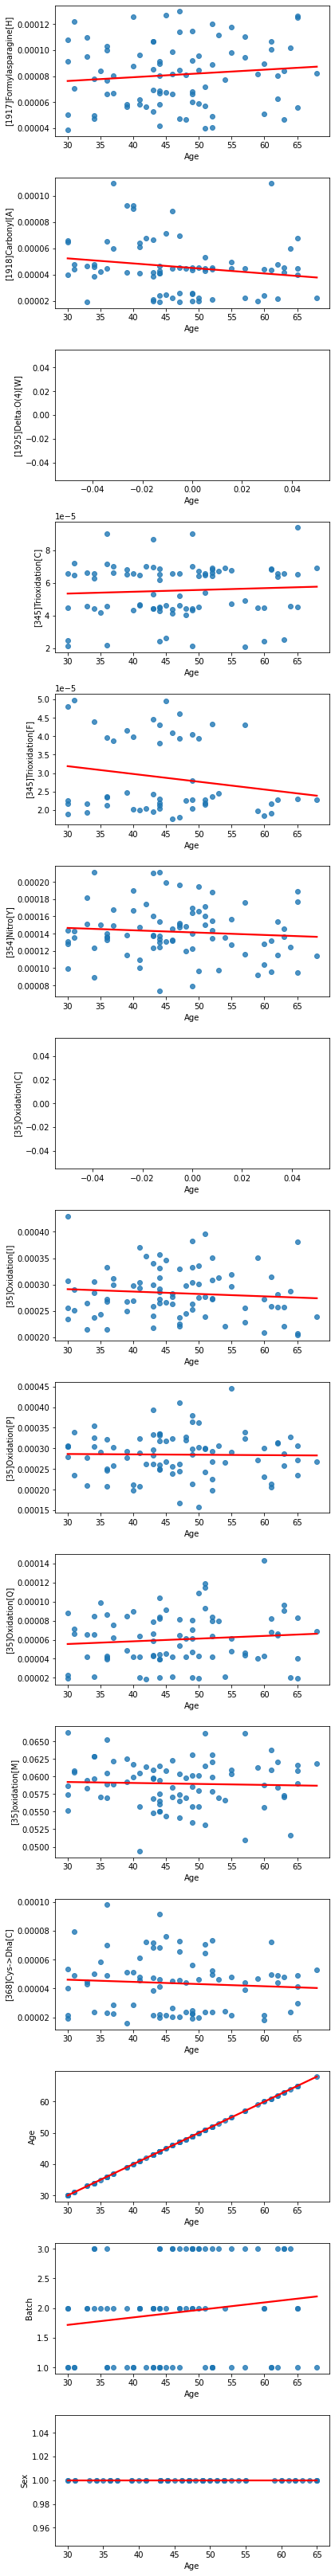

In [42]:
import numpy as np
from scipy import stats
# Define the columns to plot
ndata2 = ndata2.replace(0, np.nan)
columns_to_plot = ndata2.columns[1:16]

# Create the plot
fig, axes = plt.subplots(nrows=len(columns_to_plot), ncols=1, figsize=(6,3*len(columns_to_plot)))

# Plot each line
for i, col in enumerate(columns_to_plot):
    slope, intercept, r_value, p_value, std_err = stats.linregress(ndata2['Age'],ndata2[col])
    sns.regplot(x='Age', y=col, data=ndata2, ax=axes[i], line_kws={'label':'R^2: {}'.format(r_value**2), 'color':'r'}, ci=None)
    axes[i].set_xlabel('Age')
    axes[i].set_ylabel(col)
    
    handles, labels = axes[i].get_legend_handles_labels()
    if len(handles) > 1:
        axes[i].legend(handles=handles[1:], labels=labels[1:], loc='lower right')


# Add a legend and axis labels
fig.tight_layout(pad=1.0)
# fig.legend(loc="lower center", bbox_to_anchor=(0.5, -0.01), ncol=2)
# Show the plot
plt.show()

# Non-Specific

In [43]:
SI["UnimodAcc"] = SI["Modifications"].apply(OA.get_unimod_acc)

In [44]:
SINS = SI.groupby("UnimodAcc").sum().reset_index()

In [45]:
STINS = SINS.set_index("UnimodAcc").T

In [46]:
STINS.drop(["Gene Names", "Organism", "Oxmod?"], inplace=True)

In [47]:
STINS.reset_index(inplace=True)

In [48]:
STINS["index"] = STINS["index"].apply(lambda x: "_".join(x.split("_")[1:]))

In [49]:
nnsdata = pd.merge(STINS, traits, left_on="index", right_on="SampleID").drop('index', axis=1).set_index("SampleID")

In [50]:
nnsdata

,1384,1914,1915,1916,1917,1918,1922,1923,1925,1927,...,743,860,936,937,949,Sex,Age,PMI,Batch,RunOrder
SampleID,,,,,,,,,,,,,,,,,,,,,
ag_102_0463,0.000000,0.000000,20.469441,0.000000,20.338579,51.520263,35.158315,0.0,0.0,6.315497,...,28.519846,6.826007,0.0,0.0,0.000000,1.0,49.0,16.0,3,92
ag_81_0459,0.000000,12.650375,23.196876,11.937830,21.998870,67.147065,46.524596,0.0,0.0,5.054905,...,14.076797,0.000000,0.0,0.0,5.354155,1.0,55.0,33.0,3,72
ag_05_0306,5.976916,30.155094,18.688423,9.586472,20.023773,66.343434,25.668340,0.0,0.0,5.663921,...,20.187517,0.000000,0.0,0.0,6.230797,0.0,52.0,36.0,1,4
ag_62_0494,0.000000,17.607825,13.742638,0.000000,9.154084,60.810920,35.675835,0.0,0.0,5.102893,...,36.345633,0.000000,0.0,0.0,0.000000,1.0,51.0,41.0,2,57
ag_51_0141,0.000000,5.257100,30.859103,5.366477,28.306899,58.930674,34.461314,0.0,0.0,5.333863,...,22.583259,4.626883,0.0,0.0,5.242217,1.0,65.0,17.0,2,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ag_68_0274,0.000000,20.433606,20.037822,3.822025,10.888351,61.151850,46.790828,0.0,0.0,5.612440,...,32.381211,6.622064,0.0,0.0,4.760388,1.0,48.0,24.0,2,63
ag_67_0255,0.000000,6.916190,14.635447,3.257207,15.111177,47.492089,49.000924,0.0,0.0,5.340498,...,22.649008,0.000000,0.0,0.0,4.769046,0.0,45.0,29.0,2,62
ag_30_0231,6.035093,23.595332,14.618779,5.226503,20.369044,76.728895,37.925233,0.0,0.0,4.681997,...,37.577959,0.000000,0.0,0.0,6.116791,1.0,40.0,16.0,1,28


In [51]:
nnsdatafiltered = nnsdata.filter(["1917","1918","1925","35","368", "Age", "Batch", "Sex"], axis=1).reset_index()

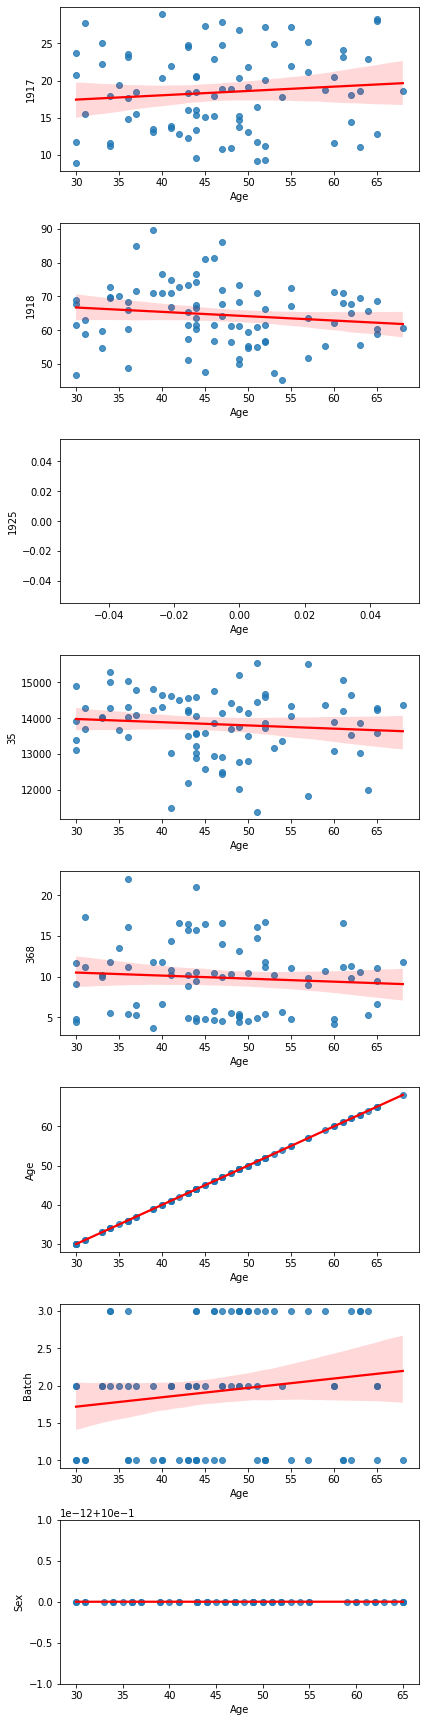

In [52]:
import numpy as np
from scipy import stats
# Define the columns to plot
nnsdatafiltered = nnsdatafiltered.replace(0, np.nan)
columns_to_plot = nnsdatafiltered.columns[1:16]

# Create the plot
fig, axes = plt.subplots(nrows=len(columns_to_plot), ncols=1, figsize=(6,3*len(columns_to_plot)))

# Plot each line
for i, col in enumerate(columns_to_plot):
    slope, intercept, r_value, p_value, std_err = stats.linregress(nnsdatafiltered['Age'],nnsdatafiltered[col])
    sns.regplot(x='Age', y=col, data=nnsdatafiltered, ax=axes[i], line_kws={'label':'R^2: {}'.format(r_value**2), 'color':'r'})
    axes[i].set_xlabel('Age')
    axes[i].set_ylabel(col)
    
    handles, labels = axes[i].get_legend_handles_labels()
    if len(handles) > 1:
        axes[i].legend(handles=handles[1:], labels=labels[1:], loc='lower right')


# Add a legend and axis labels
fig.tight_layout(pad=1.0)
# fig.legend(loc="lower center", bbox_to_anchor=(0.5, -0.01), ncol=2)
# Show the plot
plt.show()

# More normalization - unbiased

In [53]:
quantnormex = quantnorm.explode("Modifications")

In [54]:
g = quantnormex.groupby("Modifications").sum().drop(["Gene Names", "Organism"], axis=1)

In [55]:
g.replace(0, np.nan, inplace=True)

In [56]:
g.dropna(thresh=g.shape[1]*0.75, axis=0, inplace=True)

In [57]:
nunbiased = g.T

In [58]:
nunbiased = nunbiased.reset_index()

In [59]:
nunbiased["index"] = nunbiased["index"].apply(lambda x : "_".join(x.split("_")[1:]))

In [60]:
nunbiased = pd.merge(nunbiased, traits, left_on="index", right_on="SampleID")

In [61]:
import numpy as np
from scipy import stats
# Define the columns to plot
columns_to_plot = nunbiased.columns[1:-7]

# Create the plot
# fig, axes = plt.subplots(nrows=len(columns_to_plot), ncols=1, figsize=(6,3*len(columns_to_plot)))

# Plot each line
diction = {"Mod": [], "R2": [], "p": []}
for i, col in enumerate(columns_to_plot):
    slope, intercept, r_value, p_value, std_err = stats.linregress(nunbiased['Age'],nunbiased[col])
    # print("{}: R^2 = {}, p = {}".format(col, r_value**2, p_value))
    diction["Mod"].append(col)
    diction["R2"].append(r_value**2)
    diction["p"].append(p_value)

data = pd.DataFrame.from_dict(diction)

    # sns.regplot(x='Age', y=col, data=data2, ax=axes[i], line_kws={'label':'R^2: {}'.format(r_value**2), 'color':'r'})
    # axes[i].set_xlabel('Age')
    # axes[i].set_ylabel(col)
    
    # handles, labels = axes[i].get_legend_handles_labels()
    # if len(handles) > 1:
    #     axes[i].legend(handles=handles[1:], labels=labels[1:], loc='lower right')


# Add a legend and axis labels
# fig.tight_layout(pad=1.0)
# # fig.legend(loc="lower center", bbox_to_anchor=(0.5, -0.01), ncol=2)
# # Show the plot
# plt.show()

In [62]:
data.sort_values("R2", ascending=False)

,Mod,R2,p
34,[115]OxProBiotin[P],0.103658,0.002821
397,[901]4AcAllylGal[C],0.090975,0.005300
26,[1017]DMPO[Y],0.057584,0.027906
385,[7]Deamidated[R],0.050031,0.040824
175,[21]Phospho[S],0.049491,0.041957
...,...,...,...
485,[99998]ICPL_2H(4)[K],NaN,NaN
486,[999990]GIST-Quat[N-TERM],NaN,NaN
487,[999992]GIST-Quat_2H(3)[N-TERM],NaN,NaN
488,[999993]GIST-Quat_2H(3)[K],NaN,NaN
